### 1. Загрузка датасета MNIST 
Для выполнения лабораторной работы будет использована библиотека TensorFlow

In [3]:
from tensorflow.keras import datasets

In [13]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [19]:
import matplotlib.pyplot as plt

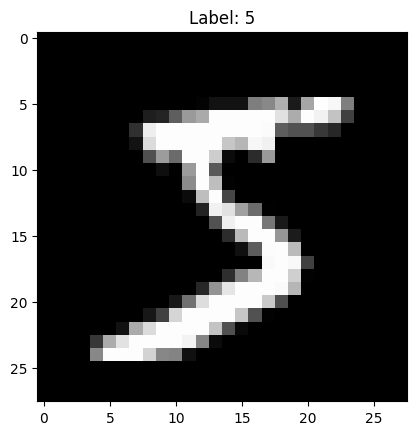

In [21]:
plt.imshow(X_train[0], cmap='gray')
plt.title(f'Label: {y_train[0]}')
plt.show()

### 2. Построение полносвязной нейронной сети для классификации изображений

In [26]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [28]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

In [34]:
image_classification_model = models.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [38]:
image_classification_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

### 3. Обучение нейросети и оценка ее точности

In [43]:
image_classification_model_learning_history = image_classification_model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7732 - loss: 0.7711 - val_accuracy: 0.9498 - val_loss: 0.1787
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9424 - loss: 0.1997 - val_accuracy: 0.9612 - val_loss: 0.1307
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9579 - loss: 0.1398 - val_accuracy: 0.9659 - val_loss: 0.1153
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9677 - loss: 0.1096 - val_accuracy: 0.9705 - val_loss: 0.1000
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9710 - loss: 0.0938 - val_accuracy: 0.9736 - val_loss: 0.0940
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9763 - loss: 0.0785 - val_accuracy: 0.9724 - val_loss: 0.0896
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9786 - loss: 0.0674 - val_accuracy: 0.9764 - val_loss: 0.0811
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9815 - loss: 0.0603 - val_accuracy: 0

In [45]:
test_loss, test_accuracy = image_classification_model.evaluate(X_test, y_test)
print(f'Точность нейросети на тестовых данных: {test_accuracy:.3f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9716 - loss: 0.0890
Точность нейросети на тестовых данных: 0.976


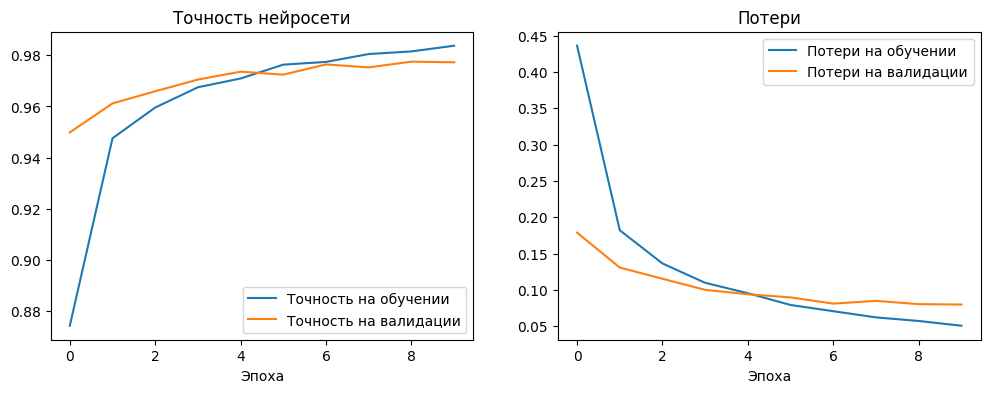

In [47]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(image_classification_model_learning_history.history['accuracy'], label='Точность на обучении')
plt.plot(image_classification_model_learning_history.history['val_accuracy'], label='Точность на валидации')
plt.title('Точность нейросети')
plt.xlabel('Эпоха')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(image_classification_model_learning_history.history['loss'], label='Потери на обучении')
plt.plot(image_classification_model_learning_history.history['val_loss'], label='Потери на валидации')
plt.title('Потери')
plt.xlabel('Эпоха')
plt.legend()

plt.show()

Если точность на обучении растет, а на валидации падает, то модель переобучается. С данной моделью так не происходит, значит обучение прошло успешно.

### 4. Визуализация примеров предсказания нейросети

In [53]:
import numpy as np

In [55]:
y_pred = image_classification_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [57]:
correct_indices = np.where(y_pred_classes == y_true)[0]
incorrect_indices = np.where(y_pred_classes != y_true)[0]

In [67]:
def plot_images(indices, title, num=5):
    plt.figure(figsize=(12, 4))
    plt.suptitle(title, fontsize=16)
    
    for i in range(num):
        index = indices[i]
        img = X_test[index].reshape(28, 28)
        plt.subplot(1, num, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f'Предсказанно: {y_pred_classes[index]}\nПравильно: {y_true[index]}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

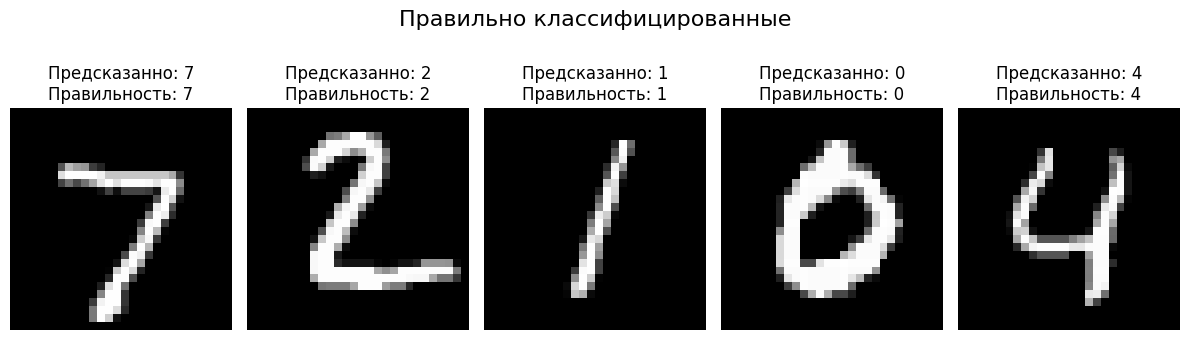

In [65]:
plot_images(correct_indices, 'Правильно классифицированные')

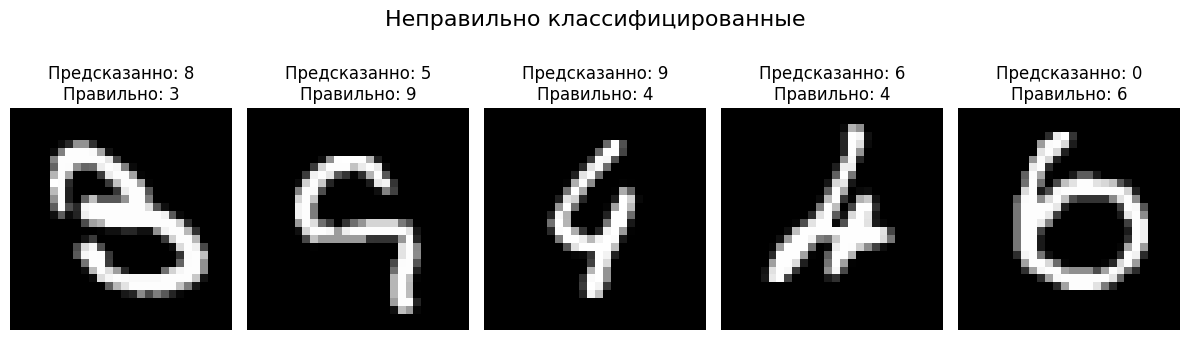

In [69]:
plot_images(incorrect_indices, 'Неправильно классифицированные')